# Assignment 1: Data Versioning and Differential Privacy Pt. 2
## ADSP 32021 IP01 Machine Learning Operations
#### Maria Clarissa Fionalita
Canvas Assignment Pages:

- [Assignment 1: Data Versioning and Differential Privacy](https://canvas.uchicago.edu/courses/52013/assignments/586652)
- [Hint for the assignment](https://edstem.org/us/courses/48613/discussion/3583746)
- [Intro to Exploratory data analysis (EDA) in Python](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python)

References:

- [Versioning Data with DVC (Hands-On Tutorial!)](https://www.youtube.com/watch?v=kLKBcPonMYw)
- [DVC Cheatsheet](https://derekchia.com/dvc/)

In [70]:
!git log --oneline

bfe075a (HEAD -> master) Updated V2 Data with total lift
3631c64 Updated V1 Data with total lift
3b2451b Data V2: removed outliers
581879d Data V1: removed irrelevant columns and encoded categorical variables
18eacf2 add raw athletes.csv
e890107 Configure remote storage


In [72]:
import pandas as pd

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Load Data

## Load V1

In [79]:
!git checkout 3631c64 data/athletes.csv.dvc
!dvc checkout
data = pd.read_csv("data/athletes.csv")
data.shape

Updated 1 path from 2973ee2
Building workspace index                              |2.00 [00:00, 88.9entry/s]
Comparing indexes                                    |3.00 [00:00, 1.42kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]
!
  0%|          |/mnt/d/UChicago/Q4/ADSP 32021 Machi0.00/? [00:00<?,        ?B/s]
  0%|          |/mnt/d/UChicago/Q4/ADSP 32021 M0.00/4.76M [00:00<?,        ?B/s]
Applying changes                                      |1.00 [00:00,  10.7file/s]
M       data/athletes.csv


(32172, 27)

# 3. For both versions calculate total_lift and divide dataset into train and test, keeping the same split ratio.

## 3.3 Train Test Split

In [80]:
def train_test_splitter(data, y_col = "total_lift", test_size = 0.2, train_size = 0.80, random_state = 42):
    if y_col in data.columns:
    
        X = data.drop(y_col, axis = 1)
        Y = data[y_col]
        return train_test_split(X, Y, test_size = test_size, train_size = train_size, random_state = random_state)
    
    if y_col not in data.columns:
        print("Target variable does not exist!")
        return [None] * 4

In [81]:
X_train, X_test, y_train, y_test = train_test_splitter(data = data, y_col = "foo")

Target variable does not exist!


# 4. Dataset Versioning using DVC

In [82]:
!git log --decorate --graph

* commit bfe075a7b27eda909f3e5a28a92d27a9a4e9d914 (HEAD -> master)
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:22:33 2023 -0500
| 
|     Updated V2 Data with total lift
| 
* commit 3631c64a60472d6b223db08d38a7247d7d068ba1
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:20:59 2023 -0500
| 
|     Updated V1 Data with total lift
| 
* commit 3b2451bf772293bdadbed06527aae27526b3bb9b
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:14:26 2023 -0500
| 
|     Data V2: removed outliers
| 
* commit 581879d55b630ce9365dea2dccd7c9df8ceaf99d
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:11:47 2023 -0500
| 
|     Data V1: removed irrelevant columns and encoded categorical variables
| 
* commit 18eacf2788db0634828cf6afdaee272655ba5cca
| Author: mariafshan <maria.c.fionalita@gmail.com>
| Date:   Mon Oct 16 19:08:40 2023 -0500
| 
|     add raw athletes.csv
| 
* commit e8901075e7484315dc33d5c

# 5. V1 EDA

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32172 entries, 0 to 32171
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         32172 non-null  float64
 1   height                      32172 non-null  float64
 2   weight                      32172 non-null  float64
 3   candj                       32172 non-null  float64
 4   snatch                      32172 non-null  float64
 5   deadlift                    32172 non-null  float64
 6   backsq                      32172 non-null  float64
 7   is_male                     32172 non-null  int64  
 8   region_Africa               32172 non-null  bool   
 9   region_Asia                 32172 non-null  bool   
 10  region_Australia            32172 non-null  bool   
 11  region_Canada East          32172 non-null  bool   
 12  region_Canada West          32172 non-null  bool   
 13  region_Central East         321

<Axes: xlabel='total_lift'>

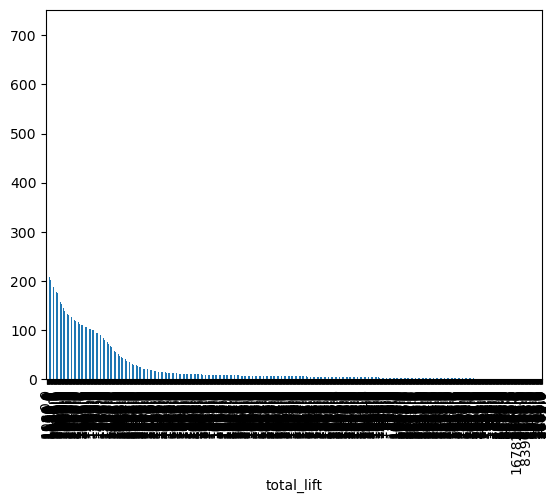

In [84]:
data["total_lift"].value_counts().plot(kind = "bar")

/tmp/ipykernel_17940/3538004476.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax, color = 'C12')


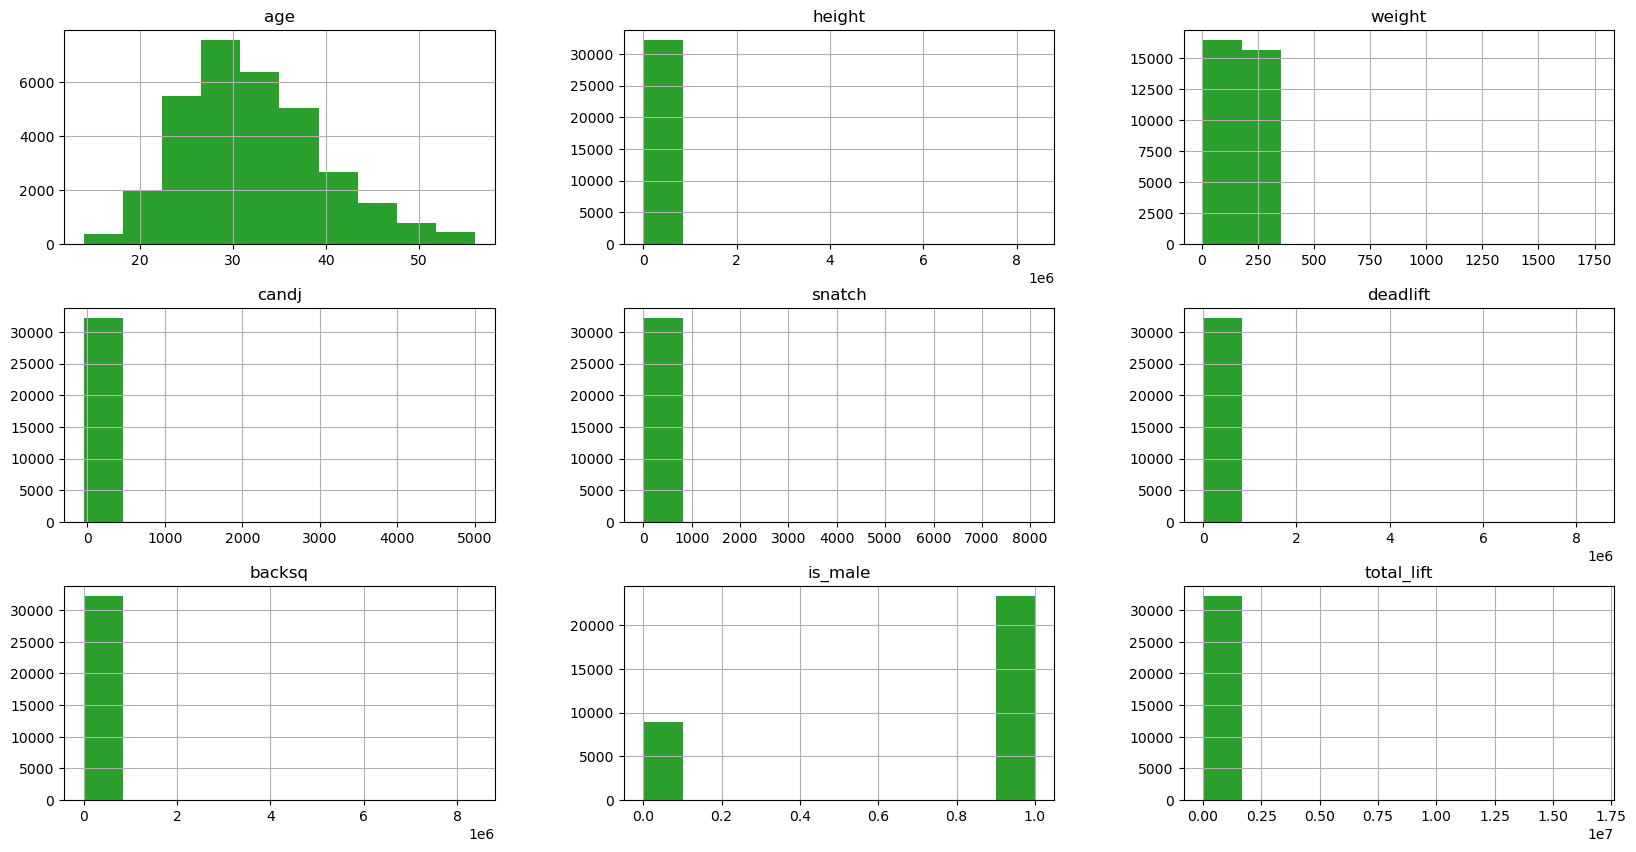

In [85]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
data.hist(ax = ax, color = 'C12')
plt.show()

<Axes: >

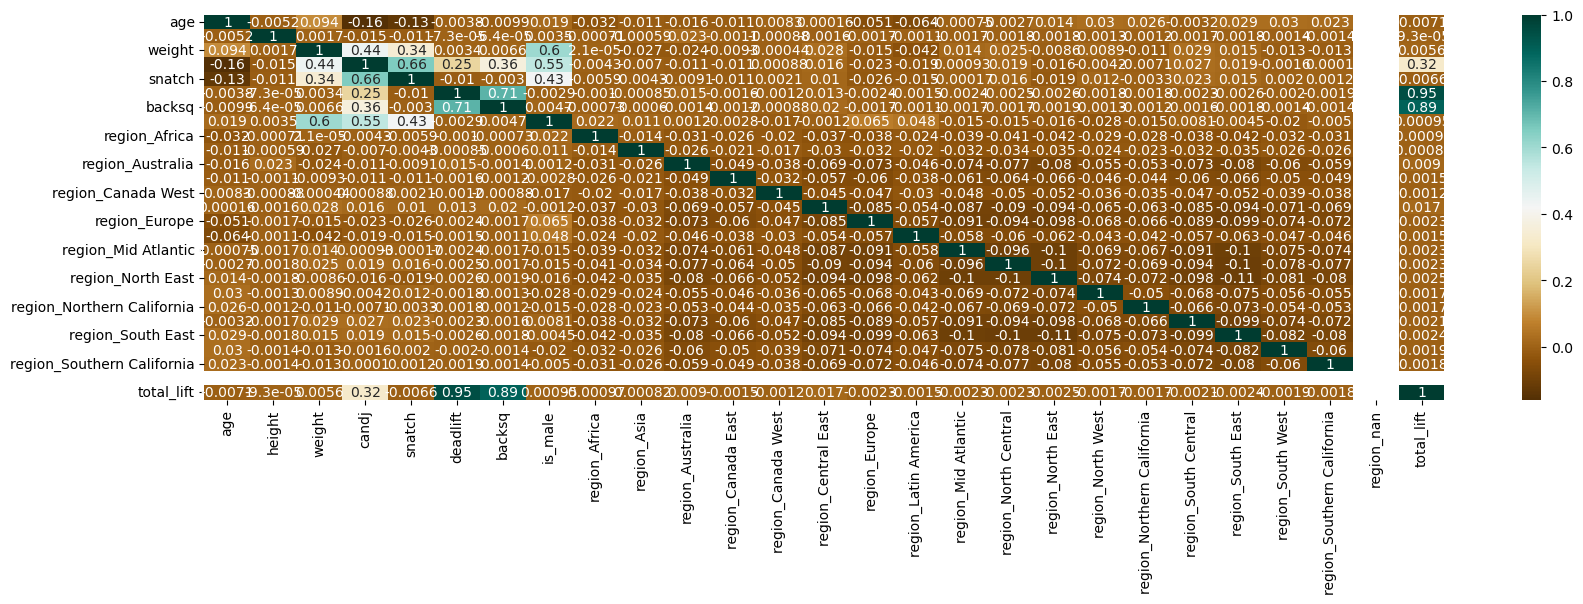

In [86]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.heatmap(data.corr(numeric_only = True), cmap = "BrBG", annot = True, ax = ax)

# 6. Baseline Machine Learning to Predict Total Lift

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
baseline_model = LinearRegression()

In [101]:
def y_predict(data, model = baseline_model):
    X_train, X_test, y_train, y_test = train_test_splitter(data = data)
    
    model.fit(X_train, y_train)
    y_pred = baseline_model.predict(X_test)
    
    return y_test, y_pred

In [102]:
y_test, y_pred = y_predict(data = data)

# 7. Run metrics for this model.

In [104]:
# print(metrics.mean_squared_error(y_test_v1, y_pred_v1, squared = False))

print(metrics.mean_squared_error(y_test, y_pred, squared = False))

7.61662118540505e-10


# 8. Update the dataset version to go to dataset v2 without changing anything else in the training code.

In [106]:
!git log --oneline

bfe075a (HEAD -> master) Updated V2 Data with total lift
3631c64 Updated V1 Data with total lift
3b2451b Data V2: removed outliers
581879d Data V1: removed irrelevant columns and encoded categorical variables
18eacf2 add raw athletes.csv
e890107 Configure remote storage


## Load V2

In [107]:
!git checkout bfe075a data/athletes.csv.dvc
!dvc checkout
data = pd.read_csv("data/athletes.csv")
data.shape

Updated 1 path from 8357cb4
Building workspace index                              |2.00 [00:00, 97.2entry/s]
Comparing indexes                                    |3.00 [00:00, 1.38kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]
!
  0%|          |/mnt/d/UChicago/Q4/ADSP 32021 Machi0.00/? [00:00<?,        ?B/s]
  0%|          |/mnt/d/UChicago/Q4/ADSP 32021 M0.00/4.57M [00:00<?,        ?B/s]
Applying changes                                      |1.00 [00:00,  10.9file/s]
M       data/athletes.csv


(30848, 27)

# 9. Run EDA (exploratory data analysis) of dataset v2.

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30848 entries, 0 to 30847
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         30848 non-null  float64
 1   height                      30848 non-null  float64
 2   weight                      30848 non-null  float64
 3   candj                       30848 non-null  float64
 4   snatch                      30848 non-null  float64
 5   deadlift                    30848 non-null  float64
 6   backsq                      30848 non-null  float64
 7   is_male                     30848 non-null  int64  
 8   region_Africa               30848 non-null  bool   
 9   region_Asia                 30848 non-null  bool   
 10  region_Australia            30848 non-null  bool   
 11  region_Canada East          30848 non-null  bool   
 12  region_Canada West          30848 non-null  bool   
 13  region_Central East         308

<Axes: xlabel='total_lift'>

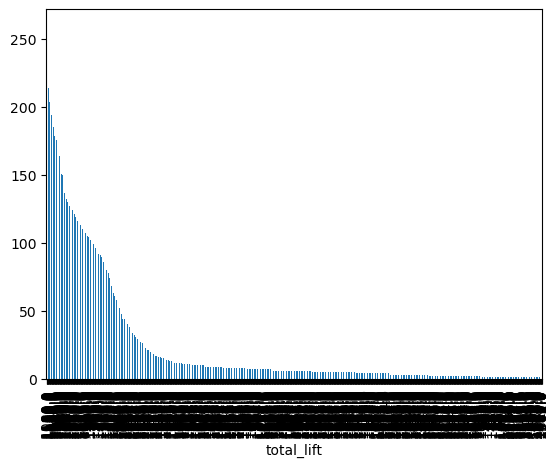

In [109]:
data["total_lift"].value_counts().plot(kind = "bar")

/tmp/ipykernel_17940/3538004476.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax, color = 'C12')


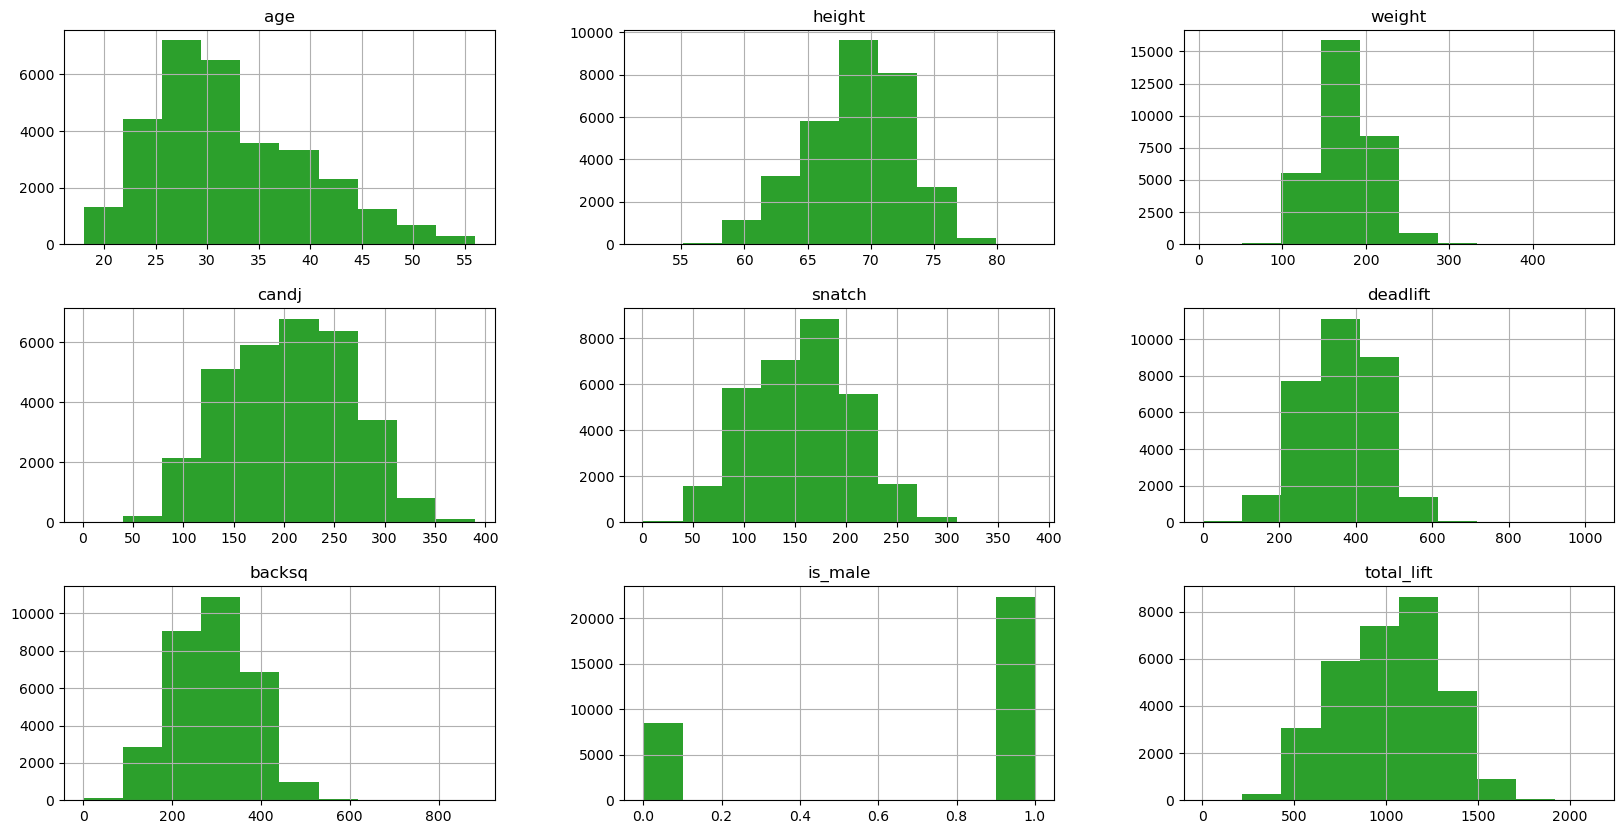

In [110]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
data.hist(ax = ax, color = 'C12')
plt.show()

<Axes: >

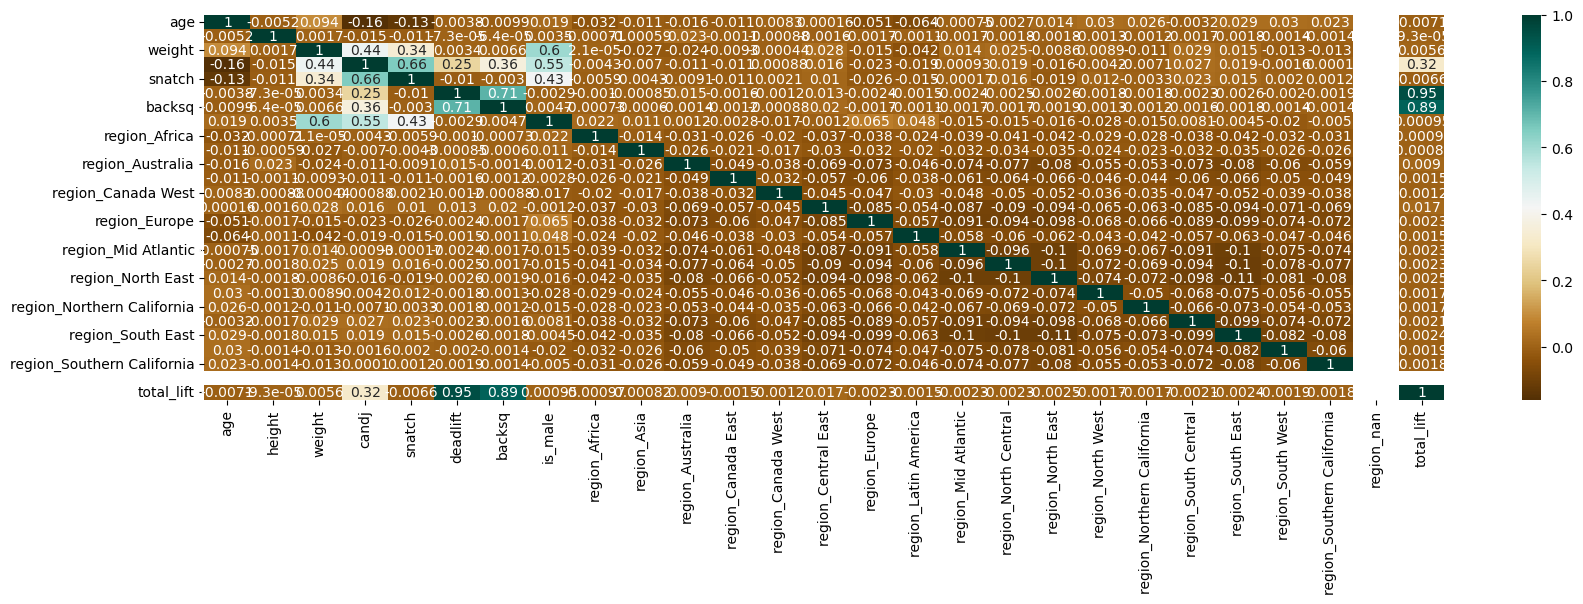

In [111]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.heatmap(v1.corr(numeric_only = True), cmap = "BrBG", annot = True, ax = ax)

# 10. Build a machine learning model with "new" dataset v2 to predict total_lift.

In [112]:
y_test, y_pred = y_predict(data = data)

# 11. Run metrics for this model.

In [113]:
print(metrics.mean_squared_error(y_test, y_pred, squared = False))

9.725631958799799e-13


# 12. Compare and comment on the accuracy/ metrics of the models using v1 and v2.
Since the first model has higher mean error than the second model, that means the second data is more accurate at predicting total lift.

# 14. Compute the DP  using TensorFlow privacy compute_dp_sgd_privacy
https://www.tensorflow.org/responsible_ai/privacy/tutorials/classification_privacy

# 15. Compare and comment on the accuracy/metrics of the non-DP and DP models using dataset v2.